In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torchview import draw_graph  # attempts to visualize computational graphs
import matplotlib.pyplot as plt
import ffmpeg_quality_metrics as ffqm  # for VMAF calculation
from PIL import Image
import cv2
import os
import random
import subprocess
import json
import numpy as np
import re   # för reguljära uttryck
import csv


# from datetime import datetime

# pip install ffmpeg_quality_metrics

"""
ffplay is not a Python module; it's a command-line tool provided by the FFmpeg project.
"""

# set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


sista-dansen.mp4
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/sista-dansen.mp4
1628
printing frame number: 772


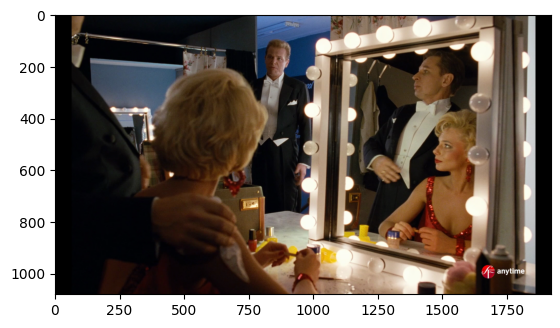

In [6]:
# läs in data

train = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train"
random_video = random.choice(os.listdir(train))
print(random_video)

video_path = os.path.join(train, random_video)
print(video_path)

cap = cv2.VideoCapture(video_path)

cap_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(cap_length)

random_frame = random.randrange(0, cap_length)
print("printing frame number:", random_frame)

cap.set(cv2.CAP_PROP_POS_FRAMES, 1000) # frame 1000

ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # avoid frame becoming blue

if ret:
    plt.imshow(frame_rgb)
    plt.show()
    
cap.release()
cv2.destroyAllWindows()


rudderless.mp4
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_test/rudderless.mp4
1455
printing frame number: 1210


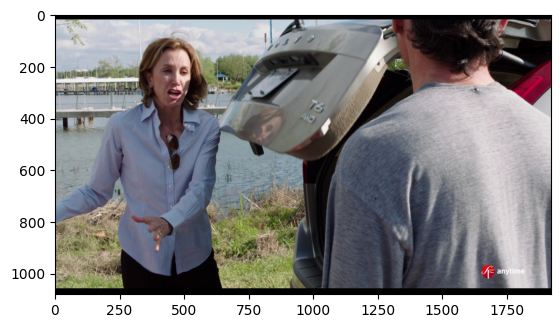

In [8]:
test = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_test"
random_video = random.choice(os.listdir(test))
print(random_video)

video_path = os.path.join(test, random_video)
print(video_path)

cap = cv2.VideoCapture(video_path)

cap_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(cap_length)

random_frame = random.randrange(0, cap_length)
print("printing frame number:", random_frame)

cap.set(cv2.CAP_PROP_POS_FRAMES, 1000) # frame 1000

ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # avoid frame becoming blue

if ret:
    plt.imshow(frame_rgb)
    plt.show()
    
cap.release()
cv2.destroyAllWindows()

In [78]:
# Rätt version av kompression
# runna inte igen
compression_levels = [23, 50, 75]

for video in os.listdir(train):
    video_path = os.path.join(train, video)
    if not os.path.isfile(video_path):
        continue                    # continue skips the current iteration if video_path is not a file, to the next iteration (instead of break that exits loop completely)
    
    # Choose a random compression level
    level = random.choice(compression_levels)
    
    # Construct the compressed file path
    compressed_filename = f"compressed_{level}_{video}"
    # ÄNDRA TILL f"{video}_compressed_{level}""
    compressed_path = os.path.join("/Users/kajsalidin/Desktop/nr-vqa-vmaf/compressed_data2", compressed_filename)
    
    # Compress the video
    subprocess.run(["ffmpeg", "-i", video_path, "-c:v", "libx264", "-crf", str(level), compressed_path])

    vmaf_command = [
        "ffmpeg",
        "-i", video_path,
        "-i", compressed_path,
        "-lavfi", f"[0:v][1:v]libvmaf=psnr=1:ssim=1:ms_ssim=1:log_fmt=json:log_path=vmaf_log_{level}_{video}.json",
        "-f", "null", "-"
    ]
    subprocess.run(vmaf_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)



ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57

In [9]:
# Kompression av testdata
# Runna inte igen
compression_levels = [23, 50, 75]

for video in os.listdir(test):
    video_path = os.path.join(test, video)
    if not os.path.isfile(video_path):
        continue                    # continue skips the current iteration if video_path is not a file, to the next iteration (instead of break that exits loop completely)
    
    # Choose a random compression level
    level = random.choice(compression_levels)
    
    # Construct the compressed file path
    compressed_filename = f"compressed_{level}_{video}"
    # ÄNDRA TILL f"{video}_compressed_{level}""
    compressed_path = os.path.join("/Users/kajsalidin/Desktop/nr-vqa-vmaf/compressed_TEST_videos", compressed_filename)
    
    # Compress the video
    subprocess.run(["ffmpeg", "-i", video_path, "-c:v", "libx264", "-crf", str(level), compressed_path])

    vmaf_command = [
        "ffmpeg",
        "-i", video_path,
        "-i", compressed_path,
        "-lavfi", f"[0:v][1:v]libvmaf=psnr=1:ssim=1:ms_ssim=1:log_fmt=json:log_path=vmaf_log_{level}_{video}.json",
        "-f", "null", "-"
    ]
    subprocess.run(vmaf_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57

In [11]:
print(len(os.listdir("/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train")))    
print(len(os.listdir("/Users/kajsalidin/Desktop/nr-vqa-vmaf/compressed_data2")))

print(len(os.listdir("/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_test")))    
print(len(os.listdir("/Users/kajsalidin/Desktop/nr-vqa-vmaf/compressed_TEST_videos")))


71
70
18
17


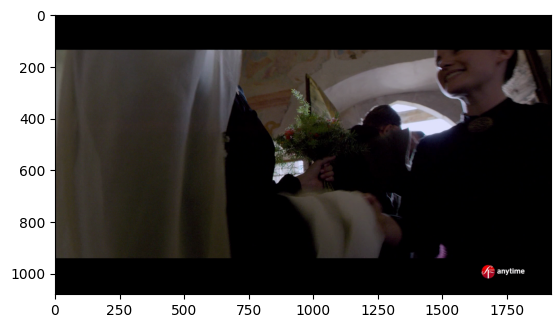

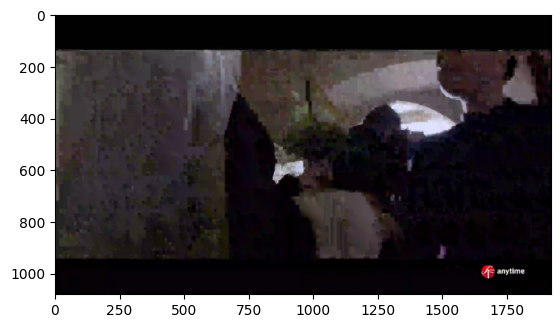

In [3]:
compressed_train = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/compressed_data2"

video_path_0 = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/compressed_data/compressed_0_a-hidden-life.mp4"
video_path_23 = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/compressed_data/compressed_23_a-hidden-life.mp4"
video_path_50 = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/compressed_data/compressed_50_a-hidden-life.mp4"
video_path_75 = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/compressed_data/compressed_75_a-hidden-life.mp4"
    
cap_0 = cv2.VideoCapture(video_path_0)
cap_75 = cv2.VideoCapture(video_path_75)

cap_0.set(cv2.CAP_PROP_POS_FRAMES, 1000)
cap_75.set(cv2.CAP_PROP_POS_FRAMES, 1000)

ret_0, frame_0 = cap_0.read()
frame_rgb_0 = cv2.cvtColor(frame_0, cv2.COLOR_BGR2RGB)   # avoid frame becoming blue

if ret_0:
    plt.imshow(frame_rgb_0)
    plt.show()
    
    
ret_75, frame_75 = cap_75.read()
frame_rgb_75 = cv2.cvtColor(frame_75, cv2.COLOR_BGR2RGB)   # avoid frame becoming blue

if ret_75:
    plt.imshow(frame_rgb_75)
    plt.show()
    

im_0 = Image.fromarray(frame_0)
im_75 = Image.fromarray(frame_75)
im_0.save("im0_TEST.png")
im_75.save("im75_TEST.png")

cap_0.release()
cap_75.release()
cv2.destroyAllWindows()

In [ ]:
# metadata över längd
# ta bort början och slut
# hur långt kvar / 10s 
# frame rate?
# loopa ffmpeg

In [13]:
# kontrollera frames per second i datasetet

fps_list = []
for video in os.listdir(train):
    video_path = str(os.path.join(train, video))

    original_cap = cv2.VideoCapture(video_path)
    fps = int(original_cap.get(cv2.CAP_PROP_FPS))
    original_frame_count = int(original_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps_list.append(fps)
    
    print(video_path, fps)
    original_cap.release()
    

print(min(fps_list))
print(max(fps_list))

/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/maria-wern-svart-fjaril.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/army-of-darkness.mp4 23
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/wallander-forsvunnen.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/the-player.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/its-a-mad-mad-mad-mad-world.mp4 23
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/the-mothman-prophecies.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/road-house.mp4 23
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/knife-fight.mp4 23
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/maria-wern-alla-de-stillsamma-doda.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/tiny-tim-king-for-a-day.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/satans-slaves.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/silent-

OpenCV: Couldn't read video stream from file "/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/.DS_Store"


/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/the-road-to-wellville.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/wish-upon.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/wheel-of-fortune-and-fantasy.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/maria-wern-drommen-forde-dig-vilse.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/bortom-tingri.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/son-of-a-gun.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/rocky-balboa.mp4 23
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/gone-in-60-seconds-1974.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/green-book.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/chitty-chitty-bang-bang.mp4 23
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/les-choses-quon-dit-les-choses-quon-fait.mp4 25
/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/traile

In [4]:
# dataset med bilder skapas
# kör inte igen
nr = 1

video_files = sorted(os.listdir(compressed_train))

for video in video_files:
    video_path = os.path.join(compressed_train, video)
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    frameNr = 0
    
    while True:
        ret, frame = cap.read()
        
        if ret:
            if frameNr % 250 == 0:
                # Save every 250th frame
                cv2.imwrite(f'/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_compressed2/train_{nr}_{video}_frame{frameNr}.png', frame)
                nr += 1
        else:
            break
        
        frameNr += 1
    
    cap.release()


In [7]:
# dataset med REFERENS-bilder skapas
# kör inte igen
nr = 1

video_files = sorted(os.listdir(train))

for video in video_files:
    video_path = os.path.join(train, video)
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    frameNr = 0
    
    while True:
        ret, frame = cap.read()
        
        if ret:
            if frameNr % 250 == 0:
                # Save every 250th frame
                cv2.imwrite(f'/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train/train_{nr}_{video}_frame{frameNr}.png', frame)
                nr += 1
        else:
            break
        
        frameNr += 1
    
    cap.release()


OpenCV: Couldn't read video stream from file "/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_train/.DS_Store"


In [12]:
# Kör om till png
# dataset med bilder skapas TESTSET
# kör inte igen

compressed_test = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/compressed_TEST_videos"
nr = 1

video_files = sorted(os.listdir(compressed_test))

for video in video_files:
    video_path = os.path.join(compressed_test, video)
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    frameNr = 0
    
    while True:
        ret, frame = cap.read()
        
        if ret:
            if frameNr % 250 == 0:
                # Save every 250th frame
                cv2.imwrite(f'/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_TEST_compressed/TEST_{nr}_{video}_frame{frameNr}.png', frame)
                nr += 1
        else:
            break
        
        frameNr += 1
    
    cap.release()

In [13]:
# Kör om till png
# dataset med REFERENS-bilder skapas TESTSET
# kör inte igen
nr = 1

video_files = sorted(os.listdir(test))

for video in video_files:
    video_path = os.path.join(test, video)
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    frameNr = 0
    
    while True:
        ret, frame = cap.read()
        
        if ret:
            if frameNr % 250 == 0:
                # Save every 250th frame
                cv2.imwrite(f'/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_TEST/TEST_{nr}_{video}_frame{frameNr}.png', frame)
                nr += 1
        else:
            break
        
        frameNr += 1
    
    cap.release()

OpenCV: Couldn't read video stream from file "/Users/kajsalidin/Desktop/nr-vqa-vmaf/data/trailers_test/.DS_Store"


/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train/train_359_maria-wern-alla-de-stillsamma-doda.mp4_frame1000.png
/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_compressed2/train_633_compressed_75_maria-wern-alla-de-stillsamma-doda.mp4_frame1000.png


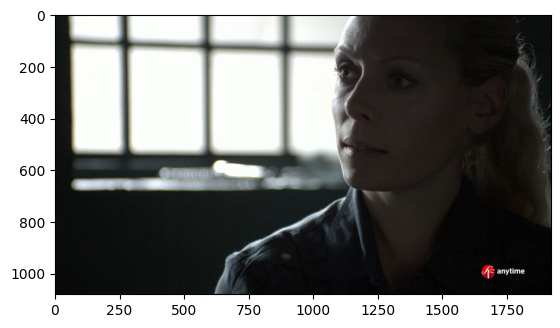

In [8]:
"""
VMAF
Algorithm:
1) Find all uncompressed frame versions. 
2) Remove frames that will not be used
3) Crop in a predetermined amount of patches, store in a new folder with descriptive names
4) loop through folder and calculate VMAF, store VMAF values in a new file 
"""

reference_frames = []
compressed_frames = []
# compressed_23 = []
# compressed_50 = []
# compressed_75 = []

for image in os.listdir("/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train"):
    im_path = os.path.join("/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train", image)
    
    reference_frames.append(im_path)

for image in os.listdir("/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_compressed2"):
    im_path = os.path.join("/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_compressed2", image)
    
    compressed_frames.append(im_path)
        

def sort_by_movie_ref(path):
    return path.split("_")[3]    # filmnamn
   
def sort_by_movie_comp(path):
    # print(path.split("_")[6])
    return path.split("_")[6]     # filmnamn


def sort_by_frame(path):
    # print(path.split("_")[-1] )
    return path.split("_")[-1]         # bara nr


reference_sorted = sorted(reference_frames, key=sort_by_movie_ref)
compressed_sorted = sorted(compressed_frames, key=sort_by_movie_comp)

reference_sorted_by_frames = sorted(reference_sorted, key=sort_by_frame)
compressed_sorted_by_frames = sorted(compressed_sorted, key=sort_by_frame)


print(reference_sorted_by_frames[100])
print(compressed_sorted_by_frames[100])

plt.imshow(plt.imread(reference_sorted_by_frames[100]))  
# plt.imshow(plt.imread(compressed_sorted_by_frames[100]))    


# göra cv2.COLOR_BGR2RGB på alla?
    

In [9]:
# Referens-frames CROP, träningsdata
# Runna inte igen!
input_folder = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train"
output_folder = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_crop_png"
crop_size = (224, 224)   # default input size of DenseNet-121

image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png'))]

for filename in image_files:
    im_path = os.path.join(input_folder, filename)
    im = Image.open(im_path)
    width, height = im.size

    num_chunks_x = width // crop_size[0]         # hur många kolumner i bilder
    num_chunks_y = height // crop_size[1]        # hur många rader

    for i in range(0, num_chunks_x):
        for j in range(0, num_chunks_y):
            
            left = i * crop_size[0]
            top = j * crop_size[1]
            right = left + crop_size[0]
            bottom = top + crop_size[1]

            cropped = im.crop((left, top, right, bottom))
            
            location_info = ""
            if i == 0:
                location_info += "left_"
            elif i == num_chunks_x - 1:
                location_info += "right_"
            if j == 0:
                location_info += "top"
            elif j == num_chunks_y - 1:
                location_info += "bottom"
                
            if left <= 960 <= right and top <= 540 <= bottom:   # mitten på bilden
                location_info += "center_"
                
            
            pos_x = left
            pos_y = top
            
            output_filename = f"{os.path.splitext(filename)[0]}_{location_info}_start_{pos_x}_{pos_y}.png"
            output_path = os.path.join(output_folder, output_filename)
            cropped.save(output_path)

            """output_filename = f"{os.path.splitext(filename)[0]}_{i}_{j}.jpg"
            output_path = os.path.join(output_folder, output_filename)
            cropped.save(output_path)"""

    im.close()


In [11]:
# komprimerade frames CROP, träningsdata
# Runna inte igen!
input_folder = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_compressed2"
output_folder = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_comp_crop_png"
crop_size = (224, 224)   # default input size of DenseNet-121

image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png'))]

for filename in image_files:
    im_path = os.path.join(input_folder, filename)
    im = Image.open(im_path)
    width, height = im.size

    num_chunks_x = width // crop_size[0]         # hur många kolumner i bilder
    num_chunks_y = height // crop_size[1]        # hur många rader

    for i in range(0, num_chunks_x):
        for j in range(0, num_chunks_y):
            
            left = i * crop_size[0]
            top = j * crop_size[1]
            right = left + crop_size[0]
            bottom = top + crop_size[1]

            cropped = im.crop((left, top, right, bottom))
            
            location_info = ""
            if i == 0:
                location_info += "left_"
            elif i == num_chunks_x - 1:
                location_info += "right_"
            if j == 0:
                location_info += "top"
            elif j == num_chunks_y - 1:
                location_info += "bottom"
                
            if left <= 960 <= right and top <= 540 <= bottom:   # mitten på bilden
                location_info += "center_"
                
            
            pos_x = left
            pos_y = top
            
            output_filename = f"{os.path.splitext(filename)[0]}_{location_info}_start_{pos_x}_{pos_y}.png"
            output_path = os.path.join(output_folder, output_filename)
            cropped.save(output_path)

            """output_filename = f"{os.path.splitext(filename)[0]}_{i}_{j}.jpg"
            output_path = os.path.join(output_folder, output_filename)
            cropped.save(output_path)"""

    im.close()

In [13]:
print(len(os.listdir("/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_comp_crop_png")))
print(len(os.listdir("/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_crop_png")))

25952
25952


(1080, 1920, 3)
start row 	-  540
end row 	-  764
start column 	-  540
end column 	-  764
(224, 224, 3)


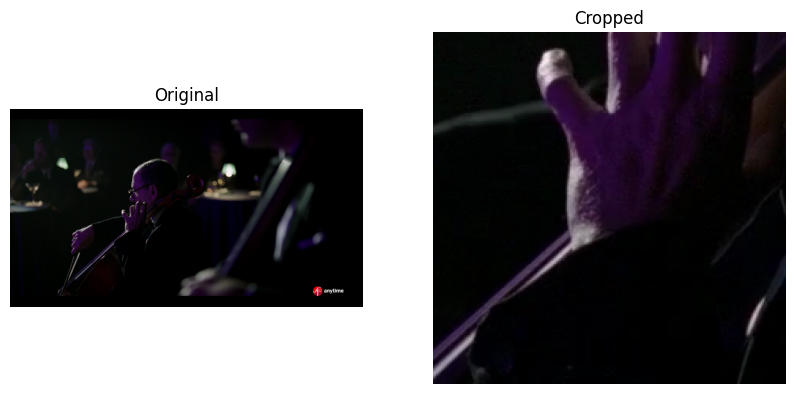

In [131]:
# test-tillämpning av crop, mitten-klippning, inte använd

image_shape = frame_rgb.shape

print(frame_rgb.shape)

# cropped_pieces = []

# imgwidth = frame_rgb.shape[0]
# imgheight = frame_rgb.shape[1]

length = 224
width = 224

start_row = 540
start_column = start_row

end_row = length + start_row

end_column = width + start_column

print("start row \t- ", start_row)
print("end row \t- ", end_row)
print("start column \t- ", start_column)
print("end column \t- ", end_column)

image_cropped = frame_rgb[start_row:end_row, start_column:end_column]


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Cropped")

ax1.imshow(frame_rgb)
ax2.imshow(image_cropped)

print(image_cropped.shape)     # (224, 224, 3)


In [4]:
reference_crops = []
compressed_crops = []

for image in os.listdir("/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_crop_png"):
    im_path = os.path.join("/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_crop_png", image)
    
    reference_crops.append(im_path)

for image in os.listdir("/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_comp_crop_png"):
    im_path = os.path.join("/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_comp_crop_png", image)
    
    compressed_crops.append(im_path)

def extract_details_ref(path):
    """
    Extracts movie name, frame number, and crop details from the path.
    """
    components = path.split("_")
    movie_name = components[5]
    frame_number = components[6]
    crop_details = "_".join(components[-2:])
    return movie_name, frame_number, crop_details


def extract_details_comp(path):
    """
    Extracts movie name, frame number, and crop details from the path.
    """
    components = path.split("_")
    movie_name = components[8]
    frame_number = components[9]
    crop_details = "_".join(components[-2:])
    return movie_name, frame_number, crop_details


def sort_by_details_ref(path):
    """
    Sorts by movie name, frame number, and crop details.
    """
    movie_name, frame_number, crop_details = extract_details_ref(path)
    return movie_name, frame_number, crop_details


def sort_by_details_comp(path):
    """
    Sorts by movie name, frame number, and crop details.
    """
    movie_name, frame_number, crop_details = extract_details_comp(path)
    return movie_name, frame_number, crop_details


reference_sorted = sorted(reference_crops, key=sort_by_details_ref)
compressed_sorted = sorted(compressed_crops, key=sort_by_details_comp)

print(reference_sorted[90])
print(compressed_sorted[90])


/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_crop_png/train_6_a-hidden-life.mp4_frame1250__start_672_448.png
/Users/kajsalidin/Desktop/nr-vqa-vmaf/images_train_comp_crop_png/train_6_compressed_23_a-hidden-life.mp4_frame1250__start_672_448.png


In [49]:
"""
Kör command och skapa output för varje bild
VMAF terminal command:
ffmpeg-quality-metrics distorted.jpg reference.jpg --metrics vmaf

where ffmpeg

Python Subprocess:
From https://www.datacamp.com/tutorial/python-subprocess : 
It's like giving commands to your computer using Python instead of typing them directly into the command prompt. This module makes it easy to automate tasks and integrate other programs with your Python code.
This can be useful for tasks such as log analysis, data processing, and text manipulation.

https://github.com/Netflix/vmaf/issues/1168 : 
You need to prepare the input in YUV frame format (or use FFmpeg's filter chaining). 
When evaluating a single frame, VMAF will set the "motion" feature value to "0", meaning depriving of the motion masking effect from its estimation.

"""

"""def process_image(dist_im, ref_im):
    command = ['/opt/homebrew/bin/ffmpeg', '-i', dist_im, '-i', ref_im, '-lavfi', 'libvmaf', '-f', 'null', '-']
    # command = ['/opt/homebrew/bin/ffmpeg-quality-metrics', dist_im, ref_im, '--metrics', 'vmaf']
    output = subprocess.check_output(command)     # os.system()?
    return output.decode('utf-8')
    # output = os.system(f'ffmpeg-quality-metrics {dist_im} {ref_im} --metrics vmaf')
    
 
"""
output_file = "/Users/kajsalidin/Desktop/nr-vqa-vmaf/vmaf_train.txt"      
folder_path1 = reference_sorted
folder_path2 = compressed_sorted

"""filenames1 = os.listdir(folder_path1)
filenames2 = os.listdir(folder_path2)"""

if len(reference_sorted) != len(compressed_sorted):
    print("Error: The number of files in the two folders is not the same.")
    exit()


for filename1, filename2 in zip(reference_sorted, compressed_sorted):
        image_path_ref = filename1
        image_path_dist = filename2
        
        command = ['/opt/homebrew/bin/ffmpeg', '-i', image_path_dist, '-i', image_path_ref, '-lavfi', 'libvmaf', '-f', 'null', '-']
        output = subprocess.check_output(command) 
        out = output.decode('utf-8')
        
        with open(output_file, 'a') as f:
            f.write(out)
            

TypeError: listdir: path should be string, bytes, os.PathLike, integer or None, not list

In [5]:
print(len(reference_sorted))
print(len(compressed_sorted))

25952
25952


In [7]:
"""
Reguljärt uttryck, re.findall() för att hitta VMAF score: och det som står efter, det ska lagras i ny fil, till exempel en csv-fil.
"""

with open('/Users/kajsalidin/Desktop/nr-vqa-vmaf/vmaf_train.txt', 'r') as f:
    pattern = re.compile(r'VMAF score: \d+\.\d+')  # \d+ matches one or more digits
    match_count = 0
    match_scores = []
    for line in f:
        matches = pattern.findall(line)
        match_count += len(matches)
        
        for match in matches:
            match_scores.append(match)
            print(match)
            
    print("Total matches:", match_count)
    
    f.close()
    
    
with open("/Users/kajsalidin/Desktop/nr-vqa-vmaf/vmaf_values_train.csv", 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        # csv_writer.writerow(['VMAF Score'])
        csv_writer.writerows([[score.strip("VMAF score: ")] for score in match_scores])
        


VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 97.427361
VMAF score: 91.220950
VMAF score: 78.767063
VMAF score: 76.772657
VMAF score: 76.406326
VMAF score: 90.143454
VMAF score: 87.162828
VMAF score: 85.024667
VMAF score: 89.484061
VMAF score: 91.779446
VMAF score: 87.731095
VMAF score: 88.729030
VMAF score: 94.608213
VMAF score: 85.725377
VMAF score

In [ ]:
"""
Här ska vi köra lite analyser, titta på distributionen av VMAF för olika ställen i bilden. 

- Kolla på medelvärde och standardavvikelse bland olika delar i bilden
- Probability distribution
- Spara detta i Excel-ark/annat?
"""

In [ ]:
"""
model.eval() is a kind of switch for some specific layers/parts of the model that behave differently 
during training and inference (evaluating) time. For example, Dropouts Layers, BatchNorm Layers etc. 
You need to turn them off during model evaluation, and .eval() will do it for you.
In addition, the common practice for evaluating/validation is using torch.no_grad() in pair with model.eval() to turn off gradients computation:
"""

model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=True)
model.eval()    # BUT, don't forget to turn back to training mode after eval step: model.train()

25952
25952
